In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [5]:
df = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/train.csv")
valid = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/validation.csv")

In [11]:
df.info()   #2697738

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697738 entries, 0 to 2697737
Data columns (total 26 columns):
click             int64
weekday           int64
hour              int64
bidid             object
logtype           int64
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        object
domain            object
url               object
urlid             object
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: int64(12), object(14)
memory usage: 535.1+ MB


In [12]:
df.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."


In [287]:
sample = df.sample(frac = 0.05)

In [288]:
sample.shape

(134887, 26)

In [52]:
sample.shape[0] # This is equivalent to the number of impressions 

30

In [197]:
#Average CTR calculations
def average_CTR(num_times, fraction, flag=0):
    average = 0 
    for i in range(num_times):
        rand_sample = df.sample(frac=fraction)
        #rand_sample.sample(frac=0.80)
        sample_CTR = rand_sample.click.value_counts().tolist()[1] / rand_sample.shape[0] #CTR
        sample_CTR = sample_CTR*100
        average += sample_CTR
        if flag == 1:
            print(sample_CTR)
    print("--------------------------")
    print("Average CTR: " + str(average/num_times))

In [249]:
start= time.time()
average_CTR(10,0.005)
end= time.time()
print("--------------------------")
print(end-start)

--------------------------
Average CTR: 0.077841203944
--------------------------
1.6387081146240234


In [293]:
#up to fraction 1  #N times = 10

raw_data = {'Sample_fraction':[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
           'Impressions':[134887,269774,404661,539548,674434,809321,944208,1079095,1213982,1348869,1483756,1618643,1753530,1888417,2023304,2158190,2293077,2427964,2562851,2697738],
           'Average_CTR':[0.0720603171544,0.0773610503607,0.0748033539185,0.073876652309,0.0754410364839,0.0758042853207,0.0748140240286,0.0751926382756,0.0747869408278,0.0746699642441,0.0768118208115,0.0754829817322,0.074888938313,0.0751581880485,0.0755052132552,0.0755586857506,0.0756974144348,0.0755365400805,0.0753769922637,0.0753964988446]}
avg_CTR_df = pd.DataFrame(raw_data, columns = ['Sample_fraction','Impressions','Average_CTR'])

In [294]:
avg_CTR_df

,Sample_fraction,Impressions,Average_CTR
0,0.05,134887,0.072060
1,0.10,269774,0.077361
2,0.15,404661,0.074803
3,0.20,539548,0.073877
4,0.25,674434,0.075441
5,0.30,809321,0.075804
6,0.35,944208,0.074814
7,0.40,1079095,0.075193
8,0.45,1213982,0.074787
9,0.50,1348869,0.074670


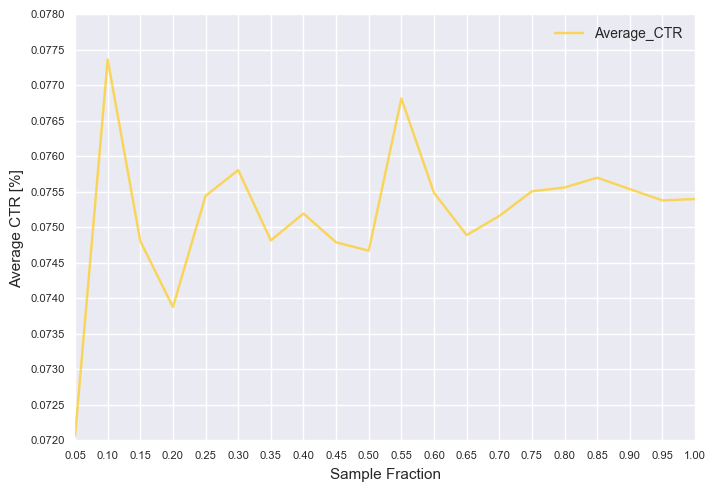

In [431]:
#Convergence of the average value when changing the fraction of sampling - N times = 10
plt.figure()
ax1 =avg_CTR_df.plot( x='Sample_fraction',y='Average_CTR',xticks=avg_CTR_df.Sample_fraction, grid=True, fontsize = 8,
               yticks=[0.072,0.0725,0.073,0.0735,0.074,0.0745,0.075,0.0755,0.076,0.0765,0.077,0.0775,0.078],
                    color= (1,0.8,0.1), alpha = 0.7)
ax1.set_ylabel('Average CTR [%]')
ax1.set_xlabel('Sample Fraction')


In [190]:
sample.click.value_counts()

0    1347863
1       1006
Name: click, dtype: int64

In [83]:
rand_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888417 entries, 783795 to 552615
Data columns (total 26 columns):
click             int64
weekday           int64
hour              int64
bidid             object
logtype           int64
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        object
domain            object
url               object
urlid             object
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: int64(12), object(14)
memory usage: 389.0+ MB


In [99]:
CTR_df= df.click.value_counts().tolist()[1] / df.shape[0] #CTR  of entire dataframe

In [134]:
round(CTR_df*100, 5)

0.075399999999999995